In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [17]:
def plot_DumbbellPlot(f1_data,auc_data):
    """
    绘制哑铃图，对比同一模型在 F1-Macro 和 AUC 两个指标上的平均表现及波动范围

    参数：
    f1_data：字典，键为模型名称；值为数值列表，每个元素对应模型在不同实验下的 F1-Macro 。
    auc_data：字典，键为模型名称，需与f1_data的键完全一致；值为数值列表，每个元素对应模型在相同实验下的 AUC 。

    配色：
    F1_color = '#3D5C6F'    # 蓝
    AUC_color= '#E47159'    # 橙
    line_color = '#D9D9D9'     # 连接线
    """
    # 设置Times New Roman字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 计算平均值和标准差
    models = list(f1_data.keys())
    avg_f1 = pd.Series({m: np.mean(f1_data[m]) for m in models})
    std_f1 = pd.Series({m: np.std(f1_data[m])  for m in models})
    avg_auc = pd.Series({m: np.mean(auc_data[m]) for m in models})
    std_auc = pd.Series({m: np.std(auc_data[m])  for m in models})
    
    y = np.arange(len(models))
    
    # 颜色定义
    F1_color = '#3D5C6F'    # 蓝
    AUC_color= '#E47159'    # 橙
    line_color = '#D9D9D9'     # 连接线
    
    # 创建画布：2 行，第一行画图例，第二行画图
    fig = plt.figure(figsize=(12, 10), dpi=200)
    gs = fig.add_gridspec(2, 1, height_ratios=[0.15, 0.85], hspace=0.035)
    
    ax_leg = fig.add_subplot(gs[0])
    ax_leg.axis('off')
    ax_leg.set_xlim(0, 1)
    ax_leg.set_ylim(0, 1)
    
    legend_y = 0.5         # 图例的垂直中心线
    patch_w, patch_h = 0.05, 0.2
    x1, x2 = 0.2, 0.6      # 两个图例块的水平起点
    
    # F1 图例块 + 文本
    ax_leg.add_patch(
        Rectangle((x1, legend_y-patch_h/2), patch_w, patch_h,
                  color=F1_color)
    )
    ax_leg.text(x1 + patch_w + 0.02, legend_y,
                'F1-Macro ± Std',
                fontsize=30, va='center')
    
    # AUC 图例块 + 文本
    ax_leg.add_patch(
        Rectangle((x2, legend_y-patch_h/2), patch_w, patch_h,
                  color=AUC_color)
    )
    ax_leg.text(x2 + patch_w + 0.02, legend_y,
                'AUC ± Std',
                fontsize=30, va='center')
    
    # --- 下半部分：绘制 dumbbell plot ---
    ax = fig.add_subplot(gs[1])
    
    for i, m in enumerate(models):
        # 灰线连接
        ax.hlines(y[i],
                  xmin=avg_f1[m],
                  xmax=avg_auc[m],
                  color=line_color,
                  linewidth=8,
                  zorder=1)
        # F1 点+误差棒（圆点+蓝色）
        ax.errorbar(avg_f1[m],
                    y[i],
                    xerr=std_f1[m],
                    fmt='o',
                    color=F1_color,
                    capsize=15,
                    markersize=15,
                    elinewidth=8,
                    zorder=2)
        # AUC 点+误差棒（方块+橙色）
        ax.errorbar(avg_auc[m],
                    y[i],
                    xerr=std_auc[m],
                    fmt='s',
                    color=AUC_color,
                    capsize=15,
                    markersize=15,
                    elinewidth=8,
                    zorder=2)
    
    # 坐标与网格
    ax.set_yticks(y)
    ax.set_yticklabels(models, fontsize=30)
    ax.invert_yaxis()
    ax.set_xlabel('Average Score (%)', fontsize=30)
    ax.tick_params(axis='x', labelsize=30)
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # 保存为PDF
    fig.savefig('DumbbellPlot.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

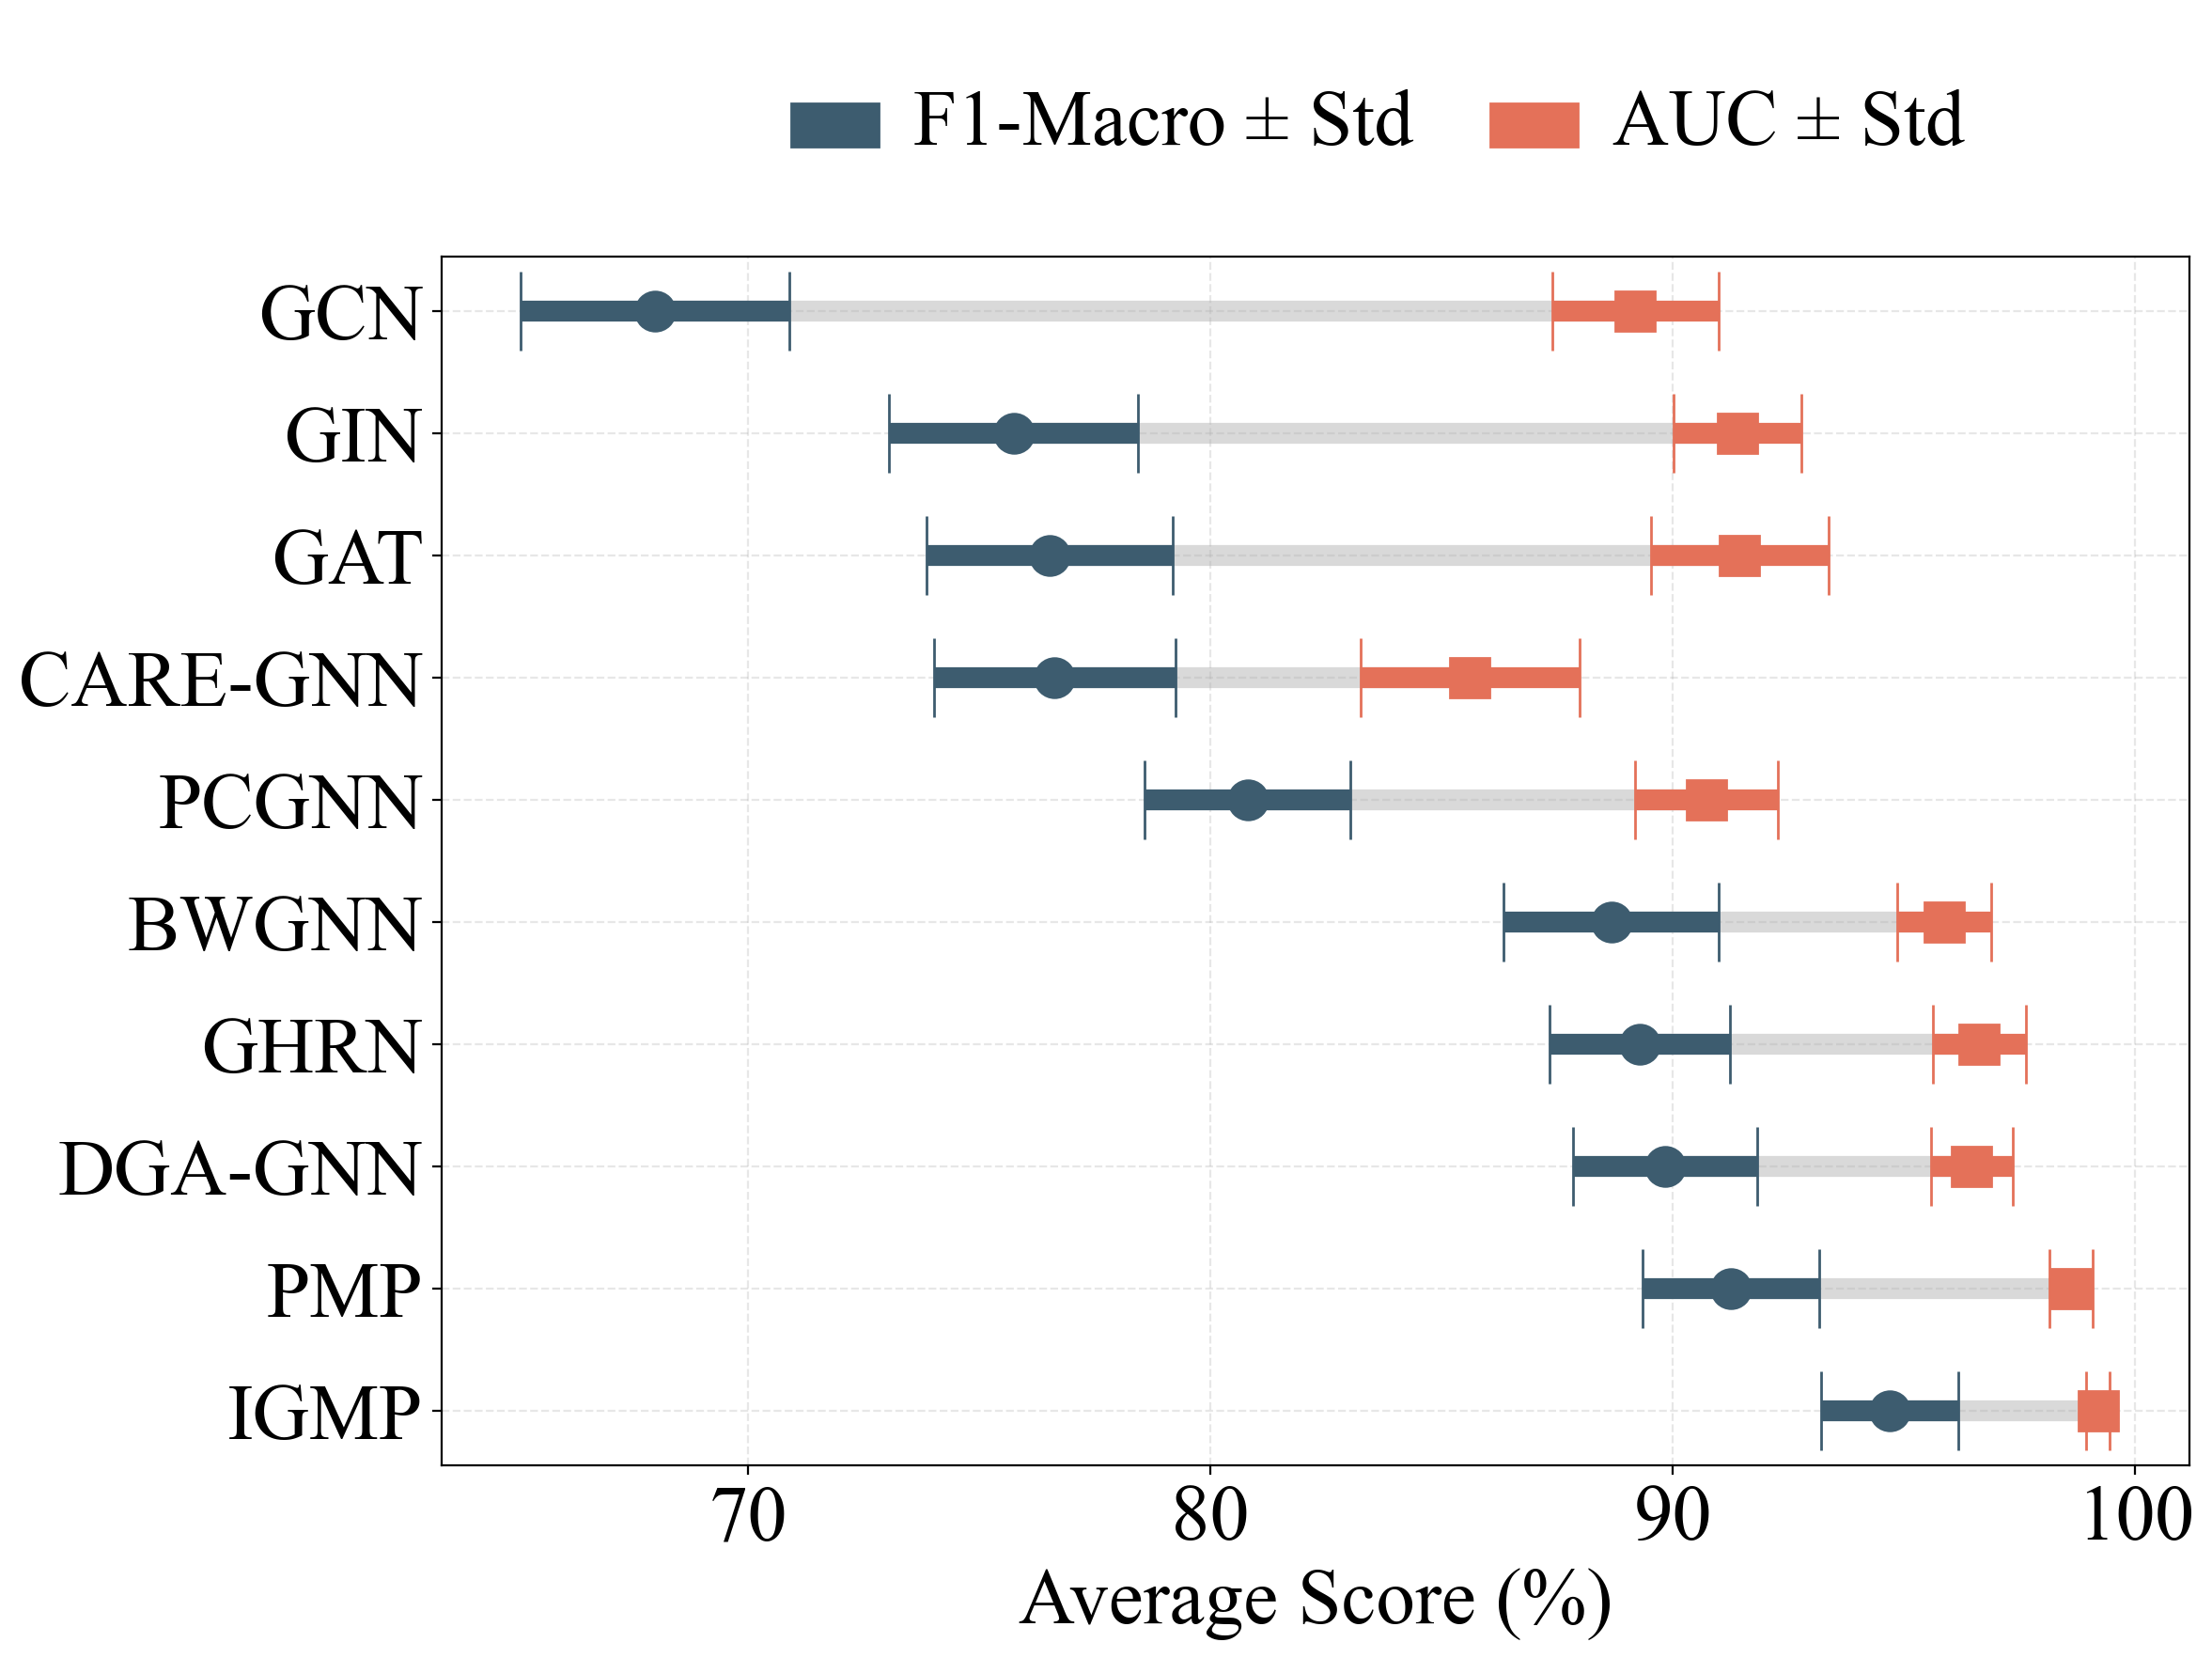

In [14]:
f1_data1={
    'GCN':[68.88,65.09,70.57,66.34,69.62,72.41,68.13,62.86],
    'GIN':[78.41,74.20,77.51,75.60,76.71,78.24,75.72,69.56],
    'GAT':[74.70,76.33,78.53,77.06,79.24,80.08,74.85,71.42],
    'CARE-GNN':[77.22,78.10,80.75,75.48,79.46,74.67,75.19,72.16],
    'PCGNN':[80.56,80.29,83.42,80.72,84.84,80.14,79.25,77.19],
    'BWGNN':[86.86,89.42,91.53,89.75,91.54,89.26,86.39,84.59],
    'GHRN':[87.10,90.54,91.68,90.40,91.02,88.57,89.32,85.61],
    'DGA-GNN':[91.32,90.64,92.35,89.17,92.45,88.09,87.26,87.47],
    'PMP':[92.87,92.46,94.20,90.37,92.52,90.04,89.15,88.39],
    'IGMP':[95.18,95.45,96.40,94.67,96.65,93.41,93.89,91.90]
}

auc_data1={
    'GCN':[86.26,90.72,91.40,89.34,90.04,88.80,90.52,86.47],
    'GIN':[88.65,92.14,92.55,90.34,92.75,91.34,92.87,90.50],
    'GAT':[87.59,92.54,93.34,91.20,92.46,93.45,91.67,89.30],
    'CARE-GNN':[89.06,86.19,88.74,85.29,83.51,86.47,83.86,81.80],
    'PCGNN':[91.50,89.77,91.34,88.46,90.49,94.07,90.46,89.75],
    'BWGNN':[94.42,97.16,96.24,95.51,96.34,97.13,95.80,94.35],
    'GHRN':[95.05,97.67,97.40,97.25,96.28,97.87,96.14,95.34],
    'DGA-GNN':[96.56,96.54,95.37,95.43,97.36,95.72,96.70,98.05],
    'PMP':[98.10,99.01,98.52,98.53,98.04,98.34,99.50,98.88],
    'IGMP':[99.15,99.40,99.04,99.09,99.42,99.12,99.63,98.76]
}
plot_DumbbellPlot(f1_data1,auc_data1)

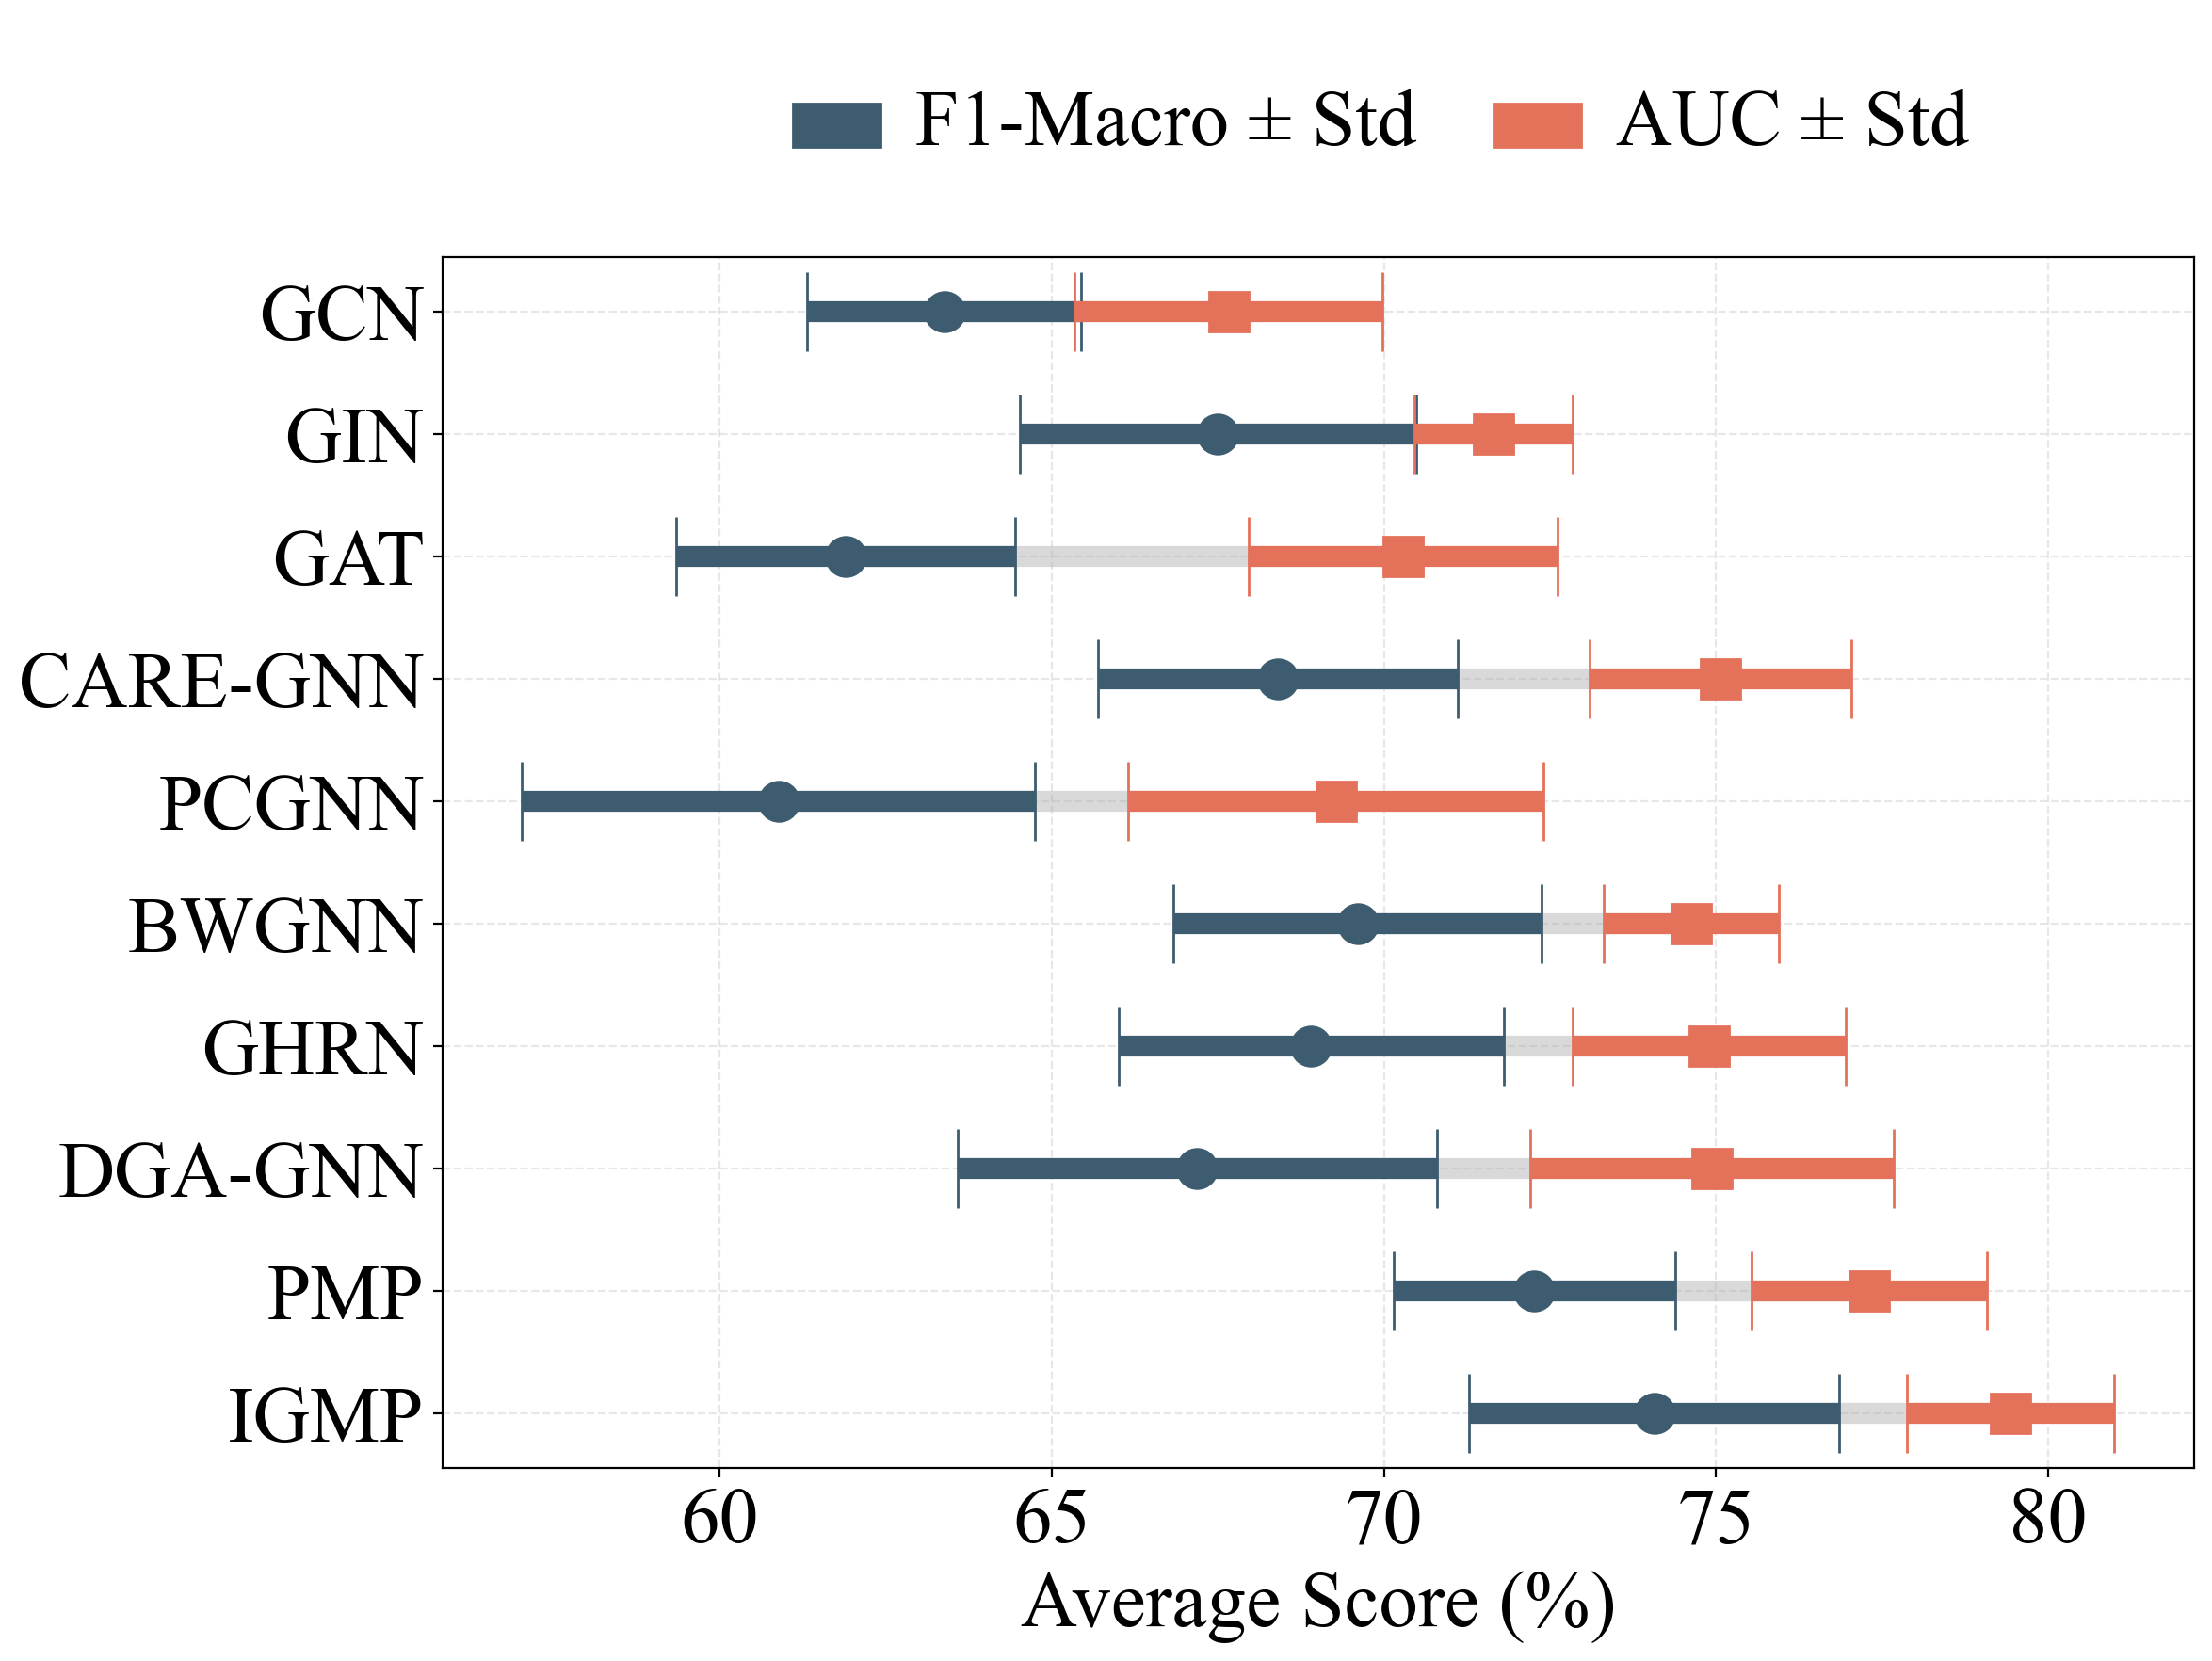

In [15]:
f1_data2={
    'GCN':[65.26,60.46,60.20,64.11,63.44,64.36,65.84],
    'GIN':[63.97,67.74,62.16,69.52,70.82,69.78,68.50],
    'GAT':[61.63,61.29,57.27,63.06,60.71,62.94,66.35],
    'CARE-GNN':[64.15,70.13,64.29,69.84,70.65,68.87,70.86],
    'PCGNN':[62.81,58.59,53.83,63.08,67.17,59.81,60.91],
    'BWGNN':[65.95,70.32,66.19,71.96,72.40,67.52,72.88],
    'GHRN':[65.57,70.76,66.80,72.33,68.18,65.68,73.03],
    'DGA-GNN':[67.78,69.07,60.83,66.89,71.24,63.38,71.14],
    'PMP':[73.21,69.38,69.56,70.81,73.89,74.35,74.66],
    'IGMP':[77.47,71.20,70.30,71.33,76.60,76.22,75.39]
}

auc_data2={
    'GCN':[72.01,69.37,68.15,64.39,66.17,66.01,67.52],
    'GIN':[73.00,70.15,71.24,71.59,72.69,69.95,72.96],
    'GAT':[67.59,70.02,67.31,72.51,72.89,68.71,73.01],
    'CARE-GNN':[79.25,72.67,74.30,75.71,75.20,73.34,75.01],
    'PCGNN':[72.16,69.87,62.15,70.97,71.67,68.88,69.25],
    'BWGNN':[74.63,72.85,75.26,73.87,73.30,76.95,75.56],
    'GHRN':[77.11,73.01,74.66,72.43,73.01,78.08,76.01],
    'DGA-GNN':[80.34,74.94,70.91,74.36,74.85,72.80,76.41],
    'PMP':[80.10,75.19,75.34,75.86,77.37,78.48,78.85],
    'IGMP':[81.43,77.65,77.22,78.79,79.11,80.96,80.90]
}
plot_DumbbellPlot(f1_data2,auc_data2)

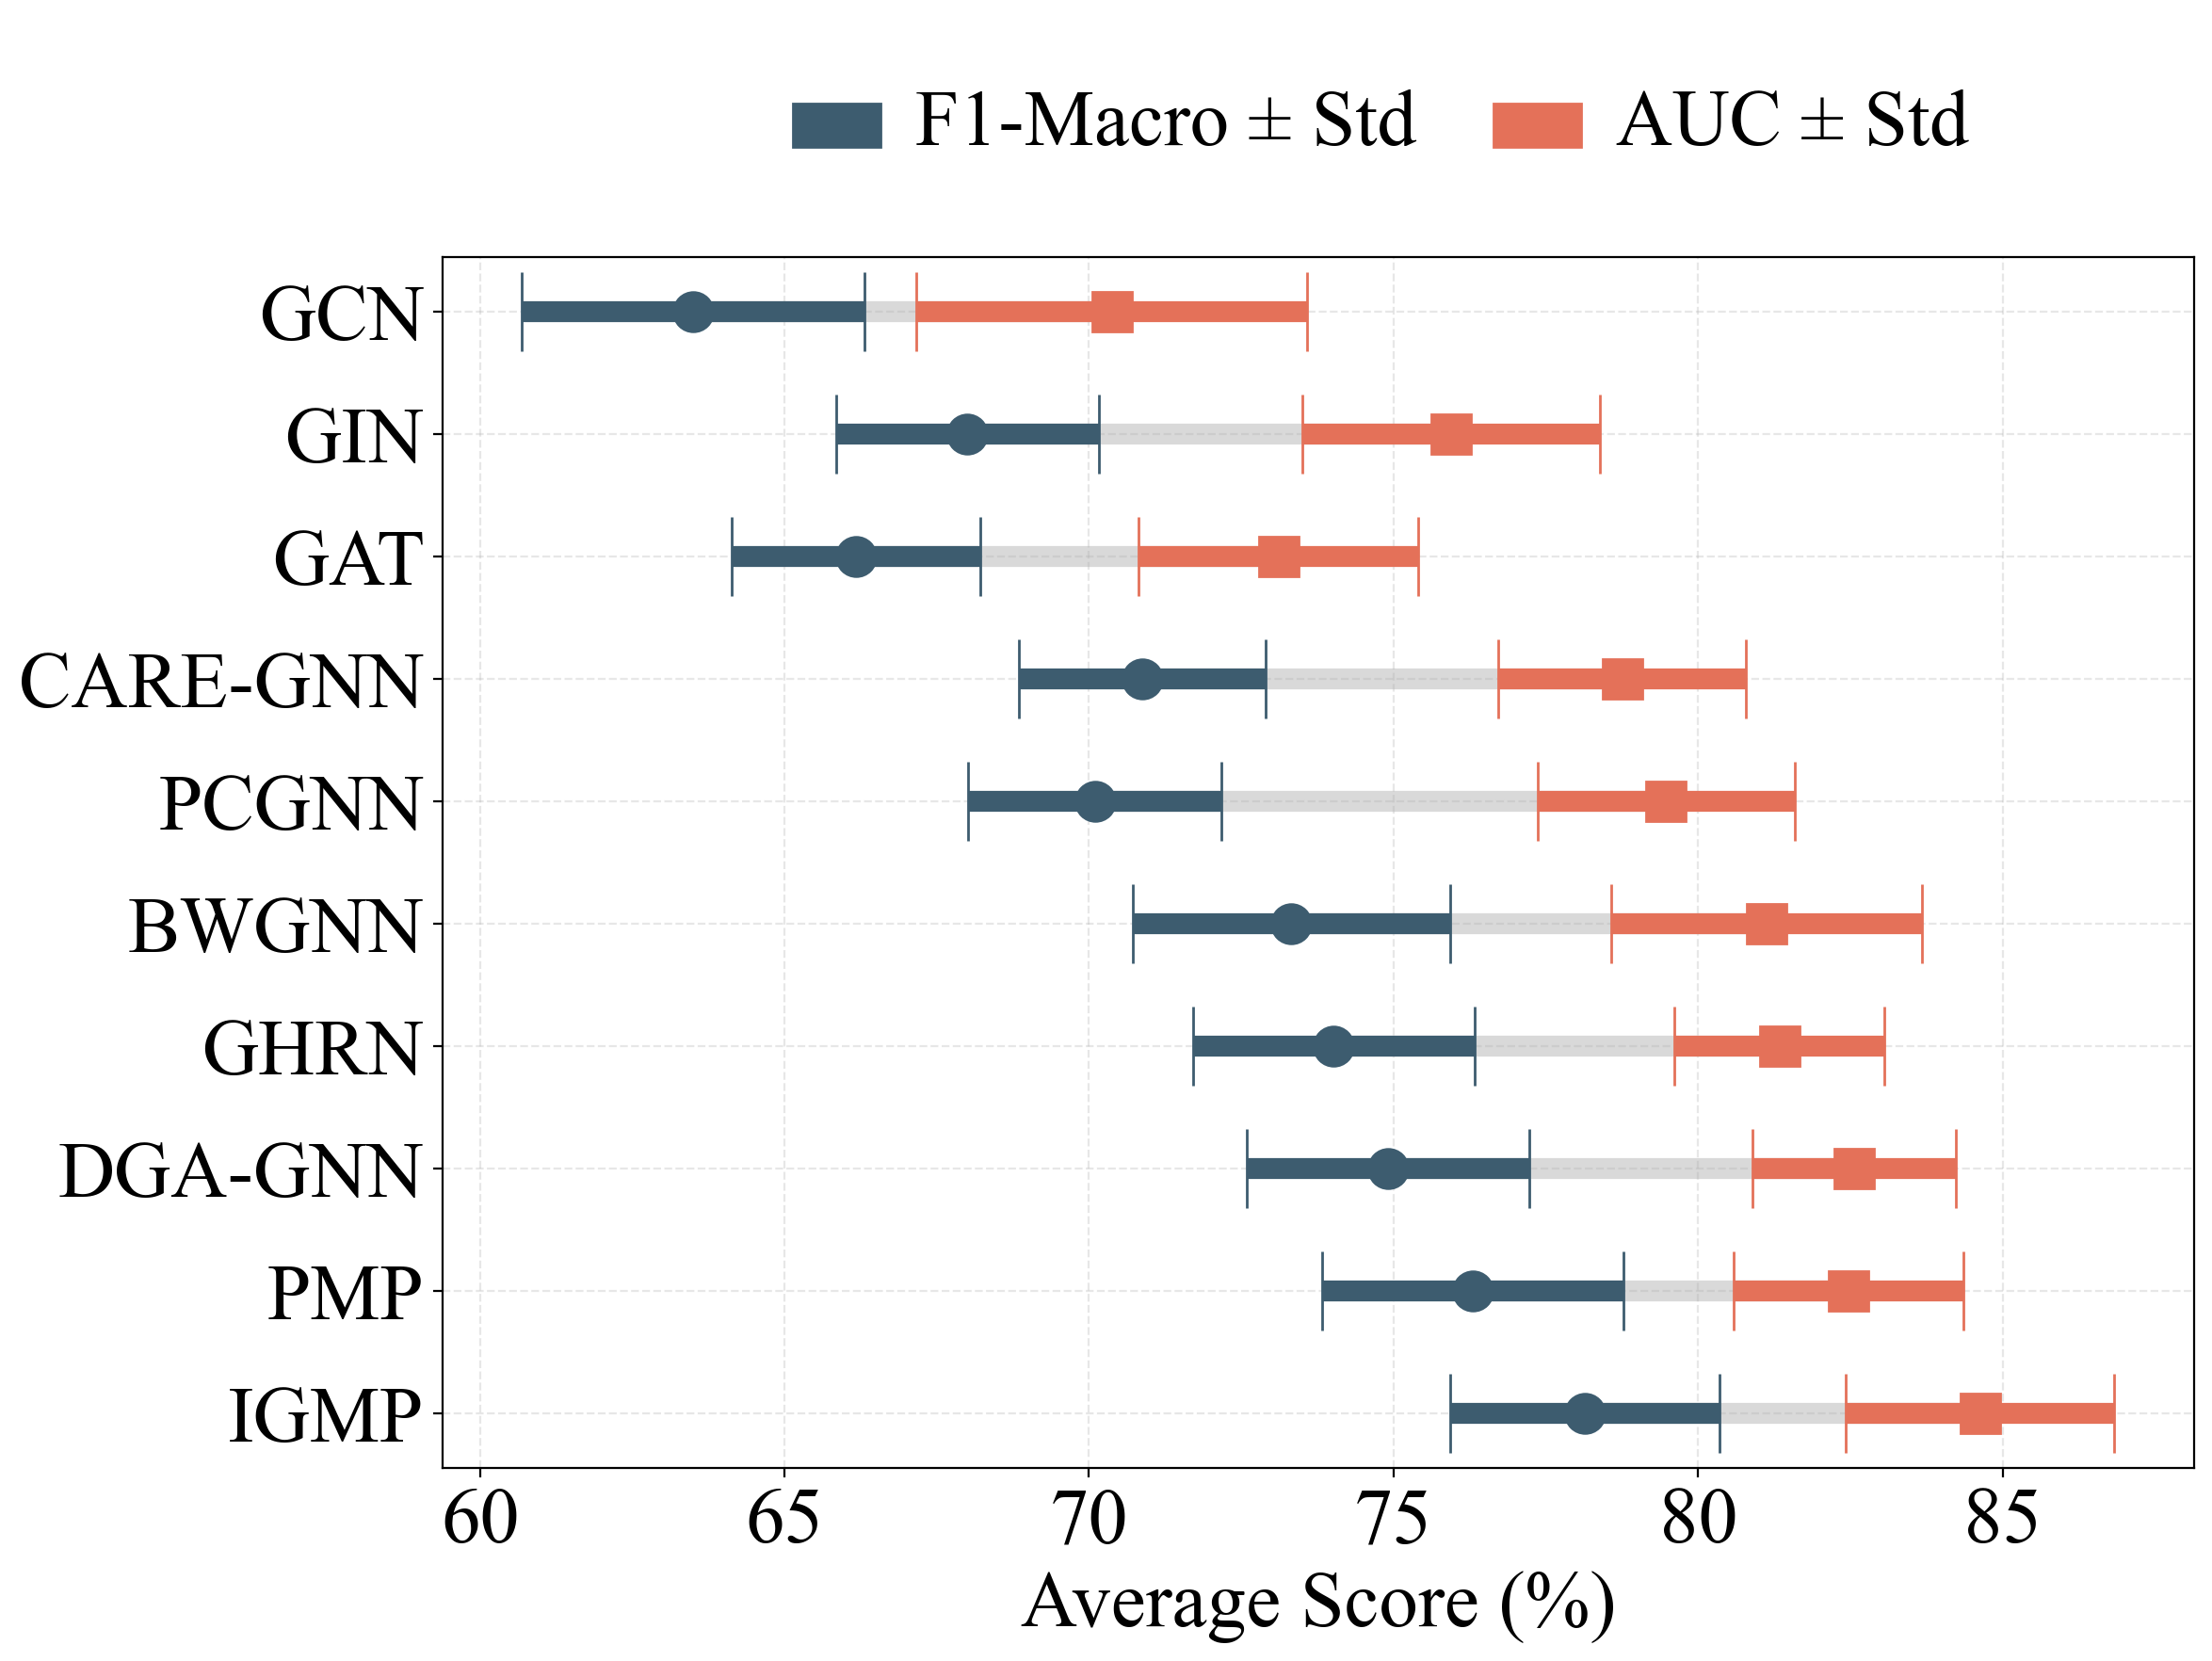

In [16]:
f1_data3={
    'GCN':[63.85,68.09,63.77,62.45,59.36],
    'GIN':[66.90,71.43,69.44,66.86,65.37],
    'GAT':[64.41,69.81,66.91,65.46,64.28],
    'CARE-GNN':[71.13,74.21,71.35,69.41,68.26],
    'PCGNN':[72.66,72.14,69.80,68.80,67.07],
    'BWGNN':[74.62,77.32,73.27,71.82,69.59],
    'GHRN':[74.92,77.15,74.81,72.97,70.24],
    'DGA-GNN':[75.35,78.59,75.58,73.29,71.74],
    'PMP':[74.52,79.61,77.53,77.27,72.55],
    'IGMP':[76.97,81.17,79.30,78.62,74.63]
}

auc_data3={
    'GCN':[70.59,75.99,70.38,68.67,66.23],
    'GIN':[76.24,80.08,76.32,74.17,72.89],
    'GAT':[71.71,77.34,73.26,72.65,70.61],
    'CARE-GNN':[80.04,81.39,79.56,76.77,76.01],
    'PCGNN':[80.76,82.43,79.55,78.46,76.18],
    'BWGNN':[83.03,84.54,81.21,79.61,77.25],
    'GHRN':[82.40,83.59,81.89,80.05,78.74],
    'DGA-GNN':[83.59,84.91,82.82,81.37,80.12],
    'PMP':[83.21,85.59,81.02,82.35,80.17],
    'IGMP':[85.98,87.82,83.64,84.44,81.27]
}
plot_DumbbellPlot(f1_data3,auc_data3)